# BANK MARKETING CAMPAIGN EFFECTIVENESS 

#### BACKGROUND :

The client is from banking sector and they conduct marketing campaign over phone to convert the liability customer (depositor) to Asset cusotmer (borrower) to earn the interest to increase revenue. Sometimes regular followup is needed in order to subscribe to the bank's term deposit.

#### OBJECTIVE :

The client has rich cusotmer records in their repository and they want leverage those to predict whether the customer will subscribe to fixed-term deposit products the bank is offering. 

#### DATA: 

The data has 17 customer attaibutes for 45211 customers. The data has customer's demographic information, relationship with the bank and customer response to the last personal loan campaign. Target column contains information regarding subscription to the term deposit.

#### ATTRIBUTE INFORMATION :

1. age : Age of the customer  
2. job : type of job 
3. marital : marital status 
4. education : Education level of the customer
5. default: has credit in default? 
6. balance: average yearly balance 
7. housing: has housing loan?  
8. loan: has personal loan? 
9. contact: contact communication type 
10. day: last contact day of the month
11. month: last contact month of year 
12. duration : last contact duration, in seconds 
13. campaign: number of contacts performed during this campaign 
14. pdays : number of days that passed by after the client  was last contacted 
15. previous: number of contacts performed before this  campaign 
16. poutcome : outcome of the previous marketing  campaign
17. target: has the client subscribed a term deposit? 

#### METHODOLOGY :

As a part of the machine larning exercise, several activities are perfomed to identify potential customers. Some of those are
       a. Importing data
       b. Data preparation and transformation.
       c. Spliting dataset into training and test sets.
       d. Model building and evalution


### SEC 1 : Calling relevant libraries/modules and importing dataset

### 1.1 Libraries and Modules

In [12]:
# Data frame and array
import numpy as np
import pandas as pd
import random

# Graph and visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data preprocessing and transformation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Feature selection
from sklearn.decomposition import PCA

# Modelling algorithm
#---Part-1
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# ---Part-2 (Ensembling technique)
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Control search
from sklearn.model_selection import GridSearchCV

# Performance and accuracy
from sklearn import metrics
from sklearn.metrics import accuracy_score

### 1.2 Importing dataset

In [13]:
# Defining the path to import the data
path = "C:/Users/user/Desktop/Great Learning/Supervised learning/Project 4_Ensemble techniques/Dataset/bank-full.csv"
data=pd.read_csv(path)
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
data.shape
# The dataset contains information of 17 customer attributes for 45211 customers.

(45211, 17)

In [15]:
# Dropping duration column from the dataset
loandata = data.drop(['duration'], axis=1)

In [16]:
loandata.shape

(45211, 16)

##### ** The duration of the call can only be known once the call has been performed , hence the status of the outcome (Target Column) will be likely to be known. We have to drop this variable, else predictive model will not be a realistic one.  

In [17]:
loandata.info() # Checking the missing value and data type. No missing value is present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [18]:
# Creating a dictionary to convert all the day numbers to weekdays
day_flag = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thrusday', 6: 'Friday', 7: 'Saturday', 8: 'Sunday', 9: 'Monday',10:'Tuesday', 11: 'Wednesday', 12 :'Thrusday',13: 'Friday', 14:'Saturday', 15:'Sunday', 16: 'Monday', 17: 'Tuesday', 18: 'Wednesday', 19:'Thrusday', 20: 'Friday', 21: 'Saturday', 22:'Sunday', 23: 'Monday', 24: 'Tuesday', 25:'Wednesday', 26:'Thrusday', 27:'Friday',28:'Saturday', 29: 'Sunday', 30:'Monday', 31:'Tuesday'}
loandata['day'].replace(day_flag, inplace = True)

## SEC 2 : Exploratory data analysis (EDA)

In [19]:
loandata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


##### ** balance and pdays are highly right skewed  i.e. mean value is greater than median value. Majorly for the presence of some obseravtion with really high value. We will not going to cap the balance and pdays as some exceptional cases those values actually can be high. However , we will transform the dataset to address those issue

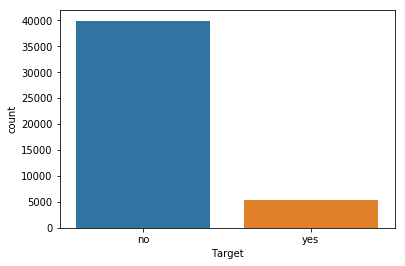

In [20]:
# Checking the distrubtion of Target column
sns.countplot(x="Target", data=loandata)

###### ** Dataset is not balanced as Target is more biased towards no class (not subscribe)

#### Categorical Variables

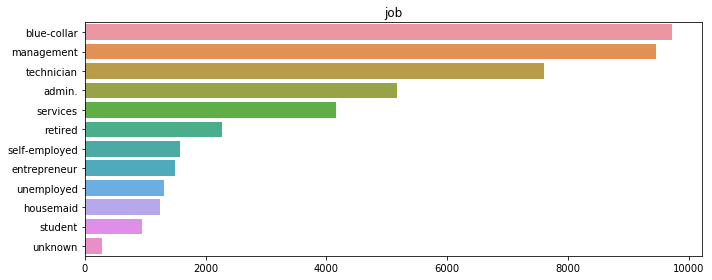

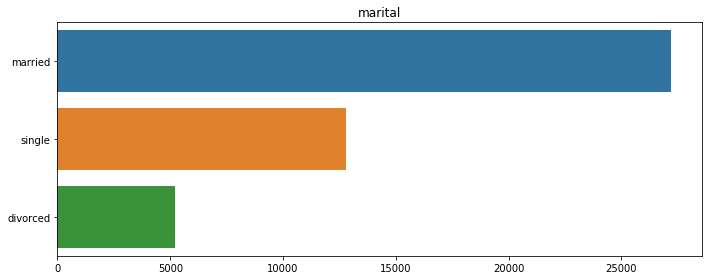

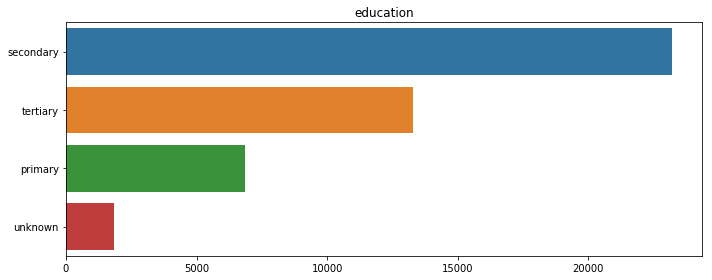

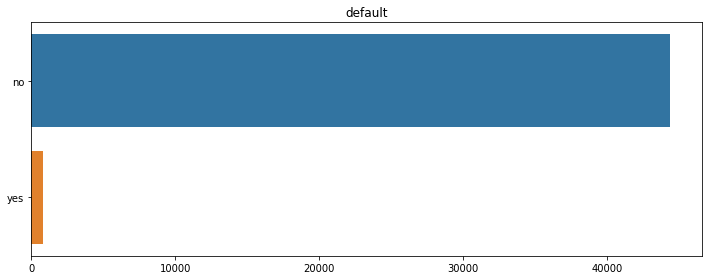

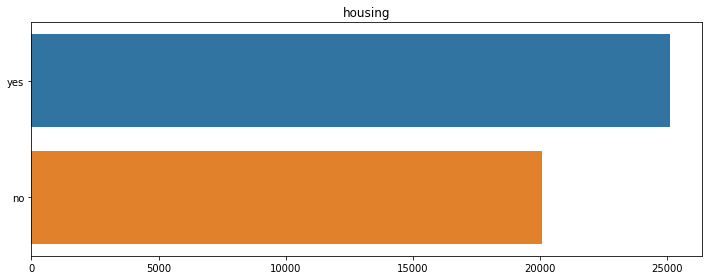

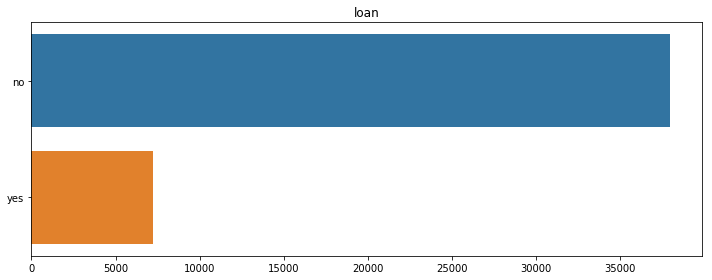

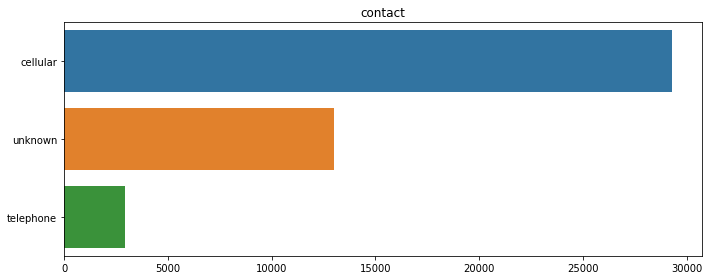

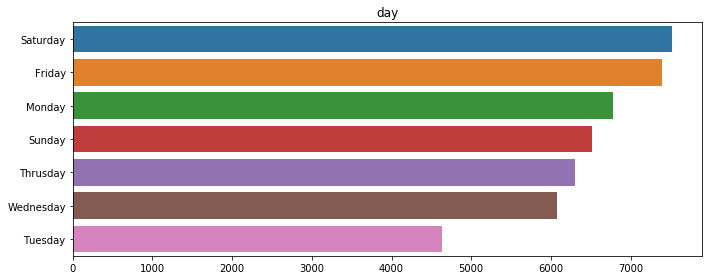

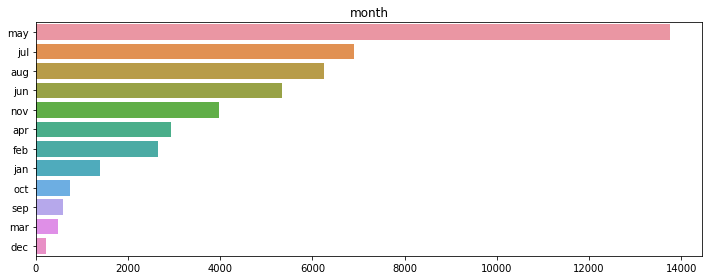

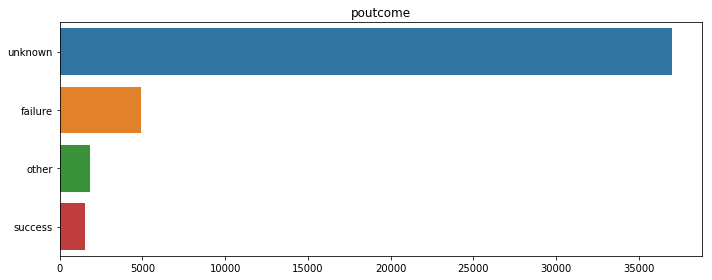

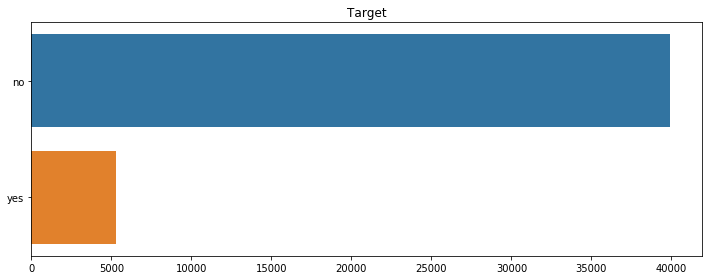

In [14]:
cat_variables = ['job', 'marital', 'education', 'default','housing','loan', 'contact', 'day','month', 'poutcome','Target']
for i in cat_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(loandata[i].value_counts().values, loandata[i].value_counts().index)
    plt.title(i)
    plt.tight_layout()

##### Inference from Result : 
i) Majorly cusotmers are majorly married and doing blue-collar, Management job.
ii) Most of the customer completed secondary education and maximum has no credit in de-fault.
iii) They majorly contacted over cellular phone, mostly on Friday-staurday and in the month of may.
iv) Data is not balanced accross subscription or non-subscription catergory for Target column.
v) Lots of unknown value for some of the attributes like job, education, contact and poutcome. 

Strategy :

We are not going to impute those missing/unknown values, instead of we will keep unknown as a separate catergory. The reason is that the "out of time"/"out of sample" dataset will have unknown values aswell and might have different underline trends. So, if we impute those unknown categories based on some trends/pattern that might not give the true picture in production with "Out of time"/"Out of sample" data.

#### Numeric Variables

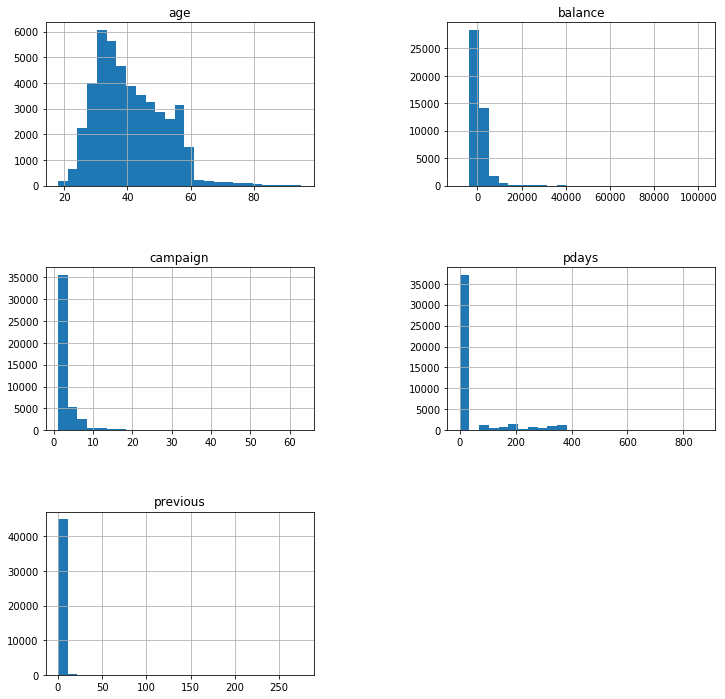

In [21]:
Numeric_variables = ['age', 'balance', 'campaign', 'pdays', 'previous']
data.hist(column=Numeric_variables,bins = 25, figsize=(12,12))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()


In [22]:
# Box plot to understand presence of extreme values in balance, duration, campaign & pdays

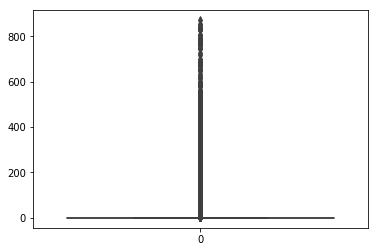

In [25]:
# pdays
sns.boxplot(data = loandata['pdays']) 

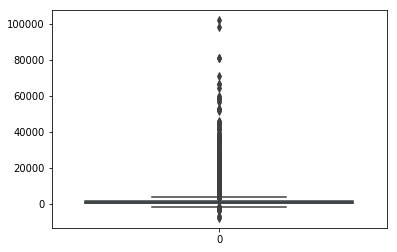

In [26]:
#balance
sns.boxplot(data = loandata['balance']) 

In [27]:
# Correlation Analysis
Numeric_variables1 =loandata[['age', 'balance', 'campaign', 'pdays', 'previous']]
Correlation = Numeric_variables1.corr()
Correlation

,age,balance,campaign,pdays,previous
age,1.000000,0.097783,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,-0.014578,0.003435,0.016674
campaign,0.004760,-0.014578,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.032855,0.454820,1.000000


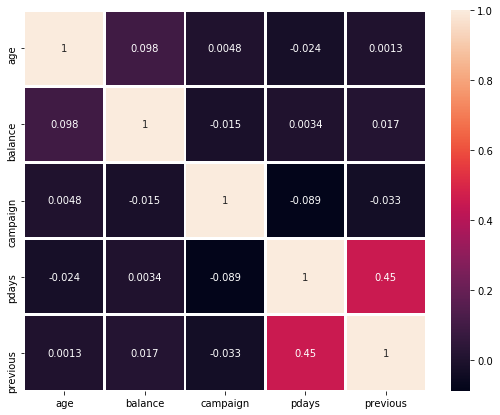

In [28]:
plt.figure(figsize=(9,7))
sns.heatmap(Correlation, annot = True, linewidths = 1.5)

##### ** positive correlation exist bewteen 'pdays' and 'previous' but not significant enough to drop any from the data

In [31]:
# Checking the data distribution in details (bi-variate analysis)
Numeric_variables1 =loandata[['age', 'balance', 'campaign', 'pdays', 'previous','Target']]

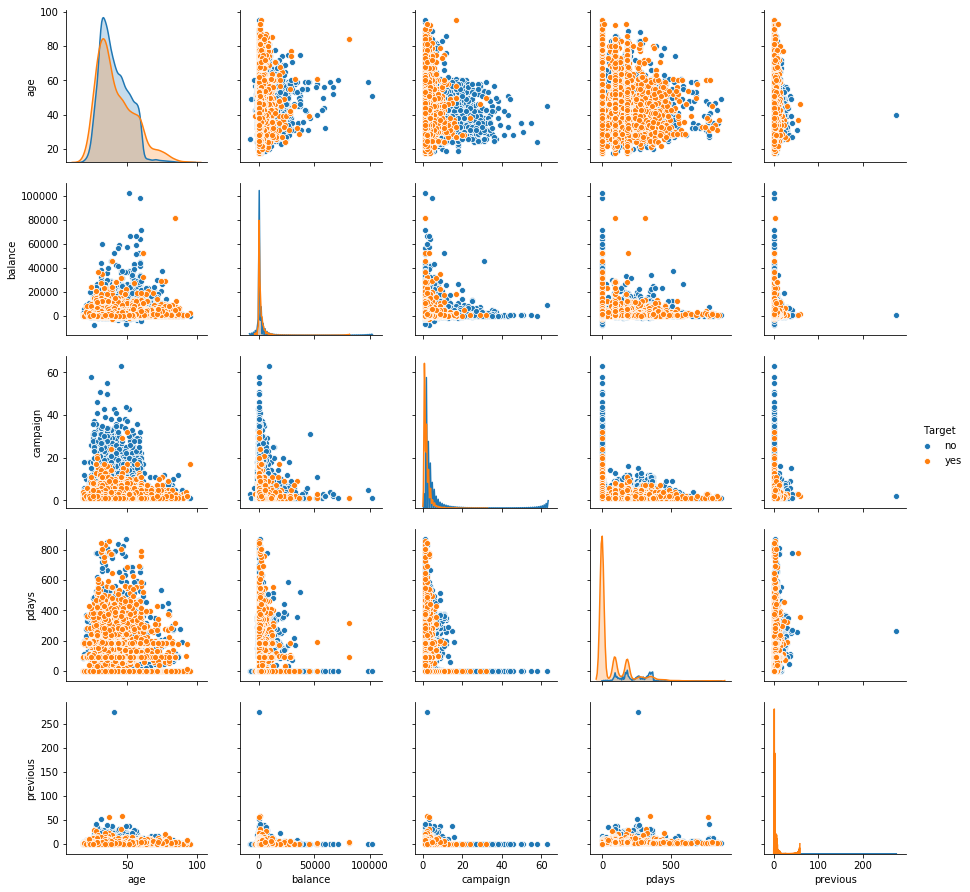

In [30]:
sns.pairplot(Numeric_variables1, hue = 'Target')

##### ** padys is significantly high for Target class "yes".

# SEC. 3 Data Preparation

### 3.1 Label encoding

#### 3.1.1 Scaler transformation (Max-min) of numeric variables

In [32]:
numeric_clmns = loandata.dtypes[loandata.dtypes != "object"].index

In [33]:
min_max_scaler = preprocessing.MinMaxScaler()

In [34]:
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(loandata[col])),columns=[col])
    return df

In [35]:
scaled_df = scaleColumns(loandata,[numeric_clmns])

In [36]:
scaled_ohe = scaled_df.copy(deep=True) # Creating an object to create one hot encoded data

In [37]:
scaled_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no


In [38]:
scaled_ohe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no


#### 3.1.2 Label encoding of categorical variables

In [39]:
# Categorical boolean mask
categorical_feature_mask = scaled_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = scaled_df.columns[categorical_feature_mask].tolist()

In [40]:
le = LabelEncoder()
scaled_df[categorical_cols] = scaled_df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [41]:
scaled_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,0.519481,4,1,2,0,0.092259,1,0,2,4,8,0.0,0.0,0.0,3,0
1,0.337662,9,2,1,0,0.073067,1,0,2,4,8,0.0,0.0,0.0,3,0
2,0.194805,2,1,1,0,0.072822,1,1,2,4,8,0.0,0.0,0.0,3,0
3,0.376623,1,1,3,0,0.086476,1,0,2,4,8,0.0,0.0,0.0,3,0
4,0.194805,11,2,3,0,0.072812,0,0,2,4,8,0.0,0.0,0.0,3,0


In [42]:
# Checking the dimension of the final data
scaled_df.shape

(45211, 16)

In [43]:
# Saving the encoded and transformed data for future use
scaled_df.to_csv(r"C:\Users\user\Desktop\Great Learning\Supervised learning\Project 4_Ensemble techniques\Dataset\l_encoded.csv", index=False)

##### ** Will be using l_encoded data for decision tree and random forest as performance might decrease due to binary class of the one-hot encoded data

### 3.2 One-Hot encoding

In [44]:
scaled_ohe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,0.519481,management,married,tertiary,no,0.092259,yes,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
1,0.337662,technician,single,secondary,no,0.073067,yes,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
2,0.194805,entrepreneur,married,secondary,no,0.072822,yes,yes,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
3,0.376623,blue-collar,married,unknown,no,0.086476,yes,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no
4,0.194805,unknown,single,unknown,no,0.072812,no,no,unknown,Thrusday,may,0.0,0.0,0.0,unknown,no


In [46]:
# Creating a copy of the orginal dataset for future reference
one_hot_data = scaled_ohe.copy(deep=True)

#### 3.2.1 Ordinal variables

In [47]:
le = LabelEncoder()
one_hot_data.default = le.fit_transform(one_hot_data.default)
one_hot_data.housing = le.fit_transform(one_hot_data.housing)
one_hot_data.loan = le.fit_transform(one_hot_data.loan)
one_hot_data.Target = le.fit_transform(one_hot_data.Target)

In [48]:
# Converting 'unknown' category to 'other' for poutcome and encoding the variables
poutcome_flag = {'unknown':'other', 'other':'other', 'failure':'failure', 'success':'success'}
one_hot_data['poutcome'].replace(poutcome_flag, inplace = True)
one_hot_data['poutcome']=one_hot_data['poutcome'].map({'failure': -1,'other': 0,'success': 1})

#### 3.2.2 Nominal variables

In [49]:
# Creating an object for the nominal variables
nom_variables = ['job','marital','education','contact','day','month']
loandata_ohe = pd.get_dummies(one_hot_data,columns=nom_variables)

In [50]:
loandata_ohe.head()

,age,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,0,0.092259,1,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,0,0.073067,1,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,0,0.072822,1,1,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,0,0.086476,1,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,0,0.072812,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
loandata_ohe.shape # Column number increased from 16 to 51

(45211, 51)

In [52]:
# Saving the encoded and transformed data for future use
loandata_ohe.to_csv(r"C:\Users\user\Desktop\Great Learning\Supervised learning\Project 4_Ensemble techniques\Dataset\oh_encoded.csv", index=False)

### Which dataset to use ?
##### One-hot coded data should be used for all model except Decision tree and Random forest. But, here I will use both the dataset to evaluate the model performance. In which cases we will get the better result, we keep that dataset for final model deployment.

# SEC 4. Training and Test data preparation

### 4.1 Label encoded data

In [53]:
# Importing the dataset
Path = "C:/Users/user/Desktop/Great Learning/Supervised learning/Project 4_Ensemble techniques/Dataset/l_encoded.csv"
l_encod = pd.read_csv(Path)
l_encod.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,0.519481,4,1,2,0,0.092259,1,0,2,4,8,0.0,0.0,0.0,3,0
1,0.337662,9,2,1,0,0.073067,1,0,2,4,8,0.0,0.0,0.0,3,0
2,0.194805,2,1,1,0,0.072822,1,1,2,4,8,0.0,0.0,0.0,3,0
3,0.376623,1,1,3,0,0.086476,1,0,2,4,8,0.0,0.0,0.0,3,0
4,0.194805,11,2,3,0,0.072812,0,0,2,4,8,0.0,0.0,0.0,3,0


In [54]:
# Object creation for independent and dependent variables for label encoded data
X_le = l_encod.loc[:, l_encod.columns != "Target"]
y_le = l_encod.loc[:, l_encod.columns == "Target"] 

In [55]:
# Creation of Training and test dataset
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.3, random_state=123)

In [56]:
# Checking the shape of the training and test dataset (Whether the dataset splitted in right way or not)
for i in (y_train_le,y_test_le):
   print(round(len(i)/len(y_le),2))

0.7
0.3


### 4.2 One-hot encoded data

In [57]:
# Importing the dataset
Path = "C:/Users/user/Desktop/Great Learning/Supervised learning/Project 4_Ensemble techniques/Dataset/oh_encoded.csv"
oh_encod = pd.read_csv(Path)
oh_encod.head()

,age,default,balance,housing,loan,campaign,pdays,previous,poutcome,Target,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,0,0.092259,1,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,0,0.073067,1,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,0,0.072822,1,1,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,0,0.086476,1,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,0,0.072812,0,0,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
# Object creation for independent and dependent variables for label encoded data
X_oh = oh_encod.loc[:, oh_encod.columns != "Target"]
y_oh = oh_encod.loc[:, oh_encod.columns == "Target"] 

### Feature selection

#### Note :
Not all the features are importnance i.e. singificant predicting (explanatory power) capability on the outcome variable (Target). So, we are not going include all the features to our model mainly beacuse of -
          i) To remove some of the less signficant varaibles 
          ii) To Reduce dimentionality and include only the signicant one to address the computational complexity.
          
We can use -  
           a) random forest and then select importance features by mentioning the cut-off (thresold limit to be included in the            selected list of the variables
           b) PCA (principle component analysis) to select the important set of variables by mentioning the thresold to capture            the desired variance limit.
For our analysis , we will be using PCA to select impotant variables to capture 95% of the variance.

In [59]:
# PCA to select important features
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(X_oh)
x_pca.shape

(45211, 28)

##### ** Out of 51 variables in the one-hot encoded datasets , only 28 varaibles are good enough to explain 95% variablilty of the dataset. So, for all our algorithm we will be using this 28 variables to train and test our model

In [60]:
# Creation of Training and test dataset
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(x_pca, y_oh, test_size=0.3, random_state=123)

In [61]:
# Checking the shape of the new dataset
X_train_oh.shape

(31647, 28)

In [62]:
# Checking whether training and test dataset splited with right ratio or not.
for i in (y_train_oh,y_test_oh):
   print(round(len(i)/len(y_oh),2))

0.7
0.3


# SEC 5. Model development

### Note :
We will be using the one-hot encoded data first to develop our model since most of the machine learning algorithm (except decision tree and random forest) perform well with one-hot encoded data. Also, We be using the label encoded data to evaluate the model performance. Finally, We will keep the dataset in which model performance will be the best.
We will develop and evaluate our model using -
  a. Logistic regression (Linear features and polynomial degree of 2 & 3)
  b. Naive bayes
  c. KNN (KNNeighbors Classification)
  d. Support Vector Machine (SVM)
  e. Decision Tree Classifier
  f. Random Forest Classifier
  g. Boosting model (Gradient and Ada boosting)

## 5.1. Logistic regression

#### 5.1.1. With linear features

In [75]:
LogReg = LogisticRegression() 
LogReg.fit(X_train_oh, y_train_oh)
y_expect=y_test_oh
y_pred = LogReg.predict(X_test_oh)
print("Accuracy:",accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification Score:\n",metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8897817752875258
Confusion Matrix:
 [[11944    54]
 [ 1441   125]]
Classification Score:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     11998
           1       0.70      0.08      0.14      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.80      0.54      0.54     13564
weighted avg       0.87      0.89      0.85     13564



##### ** Overall accuracy is decent enough but class level accuracy can be improved. Let's tune the model with higher degree of input variables and see is there any performance improvement as such or not.

#### 5.1.2 With ploynomial degree of two

In [76]:
poly_2 = PolynomialFeatures(degree=2)
X_train_oh_2 = poly_2.fit_transform(X_train_oh)

In [77]:
LogReg.fit(X_train_oh_2, y_train_oh)
y_expect=y_test_oh
y_pred = LogReg.predict(poly_2.fit_transform(X_test_oh))
print("Accuracy:",accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification Score:\n",metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8925095841934533
Confusion Matrix:
 [[11839   159]
 [ 1299   267]]
Classification Score:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11998
           1       0.63      0.17      0.27      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



##### ** Overall acuracy has improved marginaly but class level accuracy has dropped.

#### 5.1.3 With ploynomial degree of three

In [78]:
poly_3 = PolynomialFeatures(degree=3)
X_train_oh_3 = poly_3.fit_transform(X_train_oh)

In [79]:
LogReg.fit(X_train_oh_3, y_train_oh)
y_expect=y_test_oh
y_pred = LogReg.predict(poly_3.fit_transform(X_test_oh))
print("Accuracy:",accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification Score:\n",metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8828516661751695
Confusion Matrix:
 [[11671   327]
 [ 1262   304]]
Classification Score:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     11998
           1       0.48      0.19      0.28      1566

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.69      0.58      0.61     13564
weighted avg       0.85      0.88      0.86     13564



##### ** With the higher degree of input variabls, both overall and class level acuracy has been dropped. The model is performing best with linear features only. Let assess the model perfomance with label encoded data.

#### 5.1.4 With label encoded data

In [80]:
LogReg.fit(X_train_le, y_train_le)
y_expect=y_test_le
y_pred = LogReg.predict(X_test_le)
print("Accuracy:",accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification Score:\n",metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8841049837805957
Confusion Matrix:
 [[11982    16]
 [ 1556    10]]
Classification Score:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     11998
           1       0.38      0.01      0.01      1566

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.63      0.50      0.48     13564
weighted avg       0.83      0.88      0.83     13564



##### ** The model accruacy with lable encoded data is less comapred to the model accuracy with linear features of one-hot encoded data. It is quite expected since most the algorith including logistic regression perfoms best with numeric input variables.

## 5.2. Naive bayes

#### 5.2.1 With hot-encoded data

In [81]:
NB_cl = GaussianNB()
NB_cl.fit(X_train_oh, y_train_oh)
y_expect = y_test_oh
y_pred = NB_cl.predict(X_test_oh)
print("Accuracy:", accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification Report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8361840165143025
Confusion Matrix:
 [[10811  1187]
 [ 1035   531]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91     11998
           1       0.31      0.34      0.32      1566

   micro avg       0.84      0.84      0.84     13564
   macro avg       0.61      0.62      0.62     13564
weighted avg       0.84      0.84      0.84     13564



#### 5.2.2 With label encoded data

In [82]:
NB_cl = GaussianNB()
NB_cl.fit(X_train_le, y_train_le)
y_expect = y_test_le
y_pred = NB_cl.predict(X_test_le)
print("Accuracy:", accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification Report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.791064582718962
Confusion Matrix:
 [[10112  1886]
 [  948   618]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88     11998
           1       0.25      0.39      0.30      1566

   micro avg       0.79      0.79      0.79     13564
   macro avg       0.58      0.62      0.59     13564
weighted avg       0.84      0.79      0.81     13564



##### ** Overall and class level accuracy low compared to logistic regression model for both label encoded and one-hot encoded data. Here also, the model with one-hot encoded dataset performing well compared to othe one.

## 5.3. KNN (KNNeighbors Classification)

#### 5.3.1. With one-hot coded data

In [83]:
clf=KNeighborsClassifier(n_jobs=-1)
clf.fit(X_train_oh, y_train_oh)
y_expect=y_test_oh
y_pred = clf.predict(X_test_oh)
print("Accuracy:", accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification Report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8801238572692421
Confusion Matrix:
 [[11667   331]
 [ 1295   271]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     11998
           1       0.45      0.17      0.25      1566

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.68      0.57      0.59     13564
weighted avg       0.85      0.88      0.86     13564



#### 5.3.2. With label coded data

In [84]:
clf=KNeighborsClassifier(n_jobs=-1)
clf.fit(X_train_le, y_train_le)
y_expect= y_test_le
y_pred = clf.predict(X_test_le)
print("Accuracy:", accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification Report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.884399882040696
Confusion Matrix:
 [[11712   286]
 [ 1282   284]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11998
           1       0.50      0.18      0.27      1566

   micro avg       0.88      0.88      0.88     13564
   macro avg       0.70      0.58      0.60     13564
weighted avg       0.85      0.88      0.86     13564



In [ ]:
# Model tunning with hyper parameter
KNN = KNeighborsClassifier(n_jobs=-1)
params = {'algorithm':['auto', 'ball_tree', 'kd_tree'],
          'n_neighbors':[3,5,7,9],
          'leaf_size':[1,2,3,4,5],
          'weights':['uniform','distance'],
          'n_jobs':[-1]}
KNN1 = GridSearchCV(KNN, param_grid= params,n_jobs=-1)
KNN1.fit(X_train_oh, y_train_oh)
print("Best Hyper Parameters:", KNN1.best_params_)
y_expect = y_test_oh
y_pred = KNN1.predict(X_test_oh)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

##### ** Not significant performace improvement for both overall and class level accuracy

## 5.4. Support Vector Machine (SVM)

#### 5.4.1. With one-hot coded data

In [50]:
SVM = svm.SVC(random_state=1234) 
SVM.fit(X_train_oh, y_train_oh)
y_expect = y_test_oh
y_pred = SVM.predict(X_test_oh)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8935417281038042
Confusion_Matrix:
 [[11840   158]
 [ 1286   280]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11998
           1       0.64      0.18      0.28      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



#### 5.4.2. With label encoded data

In [51]:
SVM = svm.SVC(random_state=1234) 
SVM.fit(X_train_le, y_train_le)
y_expect = y_test_le
y_pred = SVM.predict(X_test_le)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8852845768209967
Confusion_Matrix:
 [[11981    17]
 [ 1539    27]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     11998
           1       0.61      0.02      0.03      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.75      0.51      0.49     13564
weighted avg       0.85      0.89      0.83     13564



##### ** As the model performing better with label encoded data, we will fine tune the model with hyper parameter using label encoded data.

In [58]:
# Model tunning with hyper parameter

# Creating an object to train the model
model=SVC(random_state=123)
# Setting the hyper parameter
params = {'C': [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
          'kernel': ['linear','rbf','sigmoid'],
         'gamma':[0.001,0.01,0.1,1,10,100]}
# Creating model with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1)
model1.fit(X_train_oh, y_train_oh)
print("Best Hyper Parameters:\n",model1.best_params_)
y_pred = model1.predict(X_test_oh)
y_expect = y_test_oh
print("Accuracy:", accuracy_score(y_expect,y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print('Classification report:\n', metrics.classification_report(y_expect, y_pred))

Best Hyper Parameters:
 {'C': 11, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.8936891772338543
Confusion Matrix:
 [[11856   142]
 [ 1300   266]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11998
           1       0.65      0.17      0.27      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



##### ** Very marginal improvement of class level accuracy with hyper parameter using one-hot encoded data

## 5.5. Decision Tree Classifier

#### 5.5.1. With one-hot coded data

In [52]:
DT = DecisionTreeClassifier(random_state=1234)
DT.fit(X_train_oh, y_train_oh)
y_expect = y_test_oh
y_pred = DT.predict(X_test_oh)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8257151282807431
Confusion_Matrix:
 [[10764  1234]
 [ 1130   436]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11998
           1       0.26      0.28      0.27      1566

   micro avg       0.83      0.83      0.83     13564
   macro avg       0.58      0.59      0.59     13564
weighted avg       0.83      0.83      0.83     13564



#### 5.5.2. With label encoded data

In [53]:
DT = DecisionTreeClassifier(random_state=1234)
DT.fit(X_train_le, y_train_le)
y_expect = y_test_le
y_pred = DT.predict(X_test_le)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8215865526393394
Confusion_Matrix:
 [[10660  1338]
 [ 1082   484]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11998
           1       0.27      0.31      0.29      1566

   micro avg       0.82      0.82      0.82     13564
   macro avg       0.59      0.60      0.59     13564
weighted avg       0.83      0.82      0.83     13564



##### ** Accuracy (classwise) is slightly better, so we will fine tune the model with hyperparameter using label encoded data.

In [54]:
# Model tunning with hyperparameter

# Setting the hyper parameter
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

DT1 = GridSearchCV(DT, param_grid=params, n_jobs=-1)
DT1.fit(X_train_le, y_train_le)
print("Best Hyper Parameters:",DT1.best_params_)
y_pred=DT1.predict(X_test_le)
y_expect = y_test_le
print("Accuracy:",metrics.accuracy_score(y_expect, y_pred))
print("Confusion Metrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification_report:\n", metrics.classification_report(y_expect, y_pred))

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 11, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.8888233559422
Confusion Metrix:
 [[11751   247]
 [ 1261   305]]
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11998
           1       0.55      0.19      0.29      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.73      0.59      0.61     13564
weighted avg       0.86      0.89      0.86     13564



##### ** Using hyper parameter model performance significantly both overall and class level accuracy. 

## 5.6. Random Forest Classifier

#### 5.6.1. With one-hot coded data

In [55]:
RFC = RandomForestClassifier(n_jobs=-1,random_state=123)
RFC.fit(X_train_oh, y_train_oh)
y_expect = y_test_oh
y_pred = RFC.predict(X_test_oh)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.86655853730463
Confusion_Matrix:
 [[11456   542]
 [ 1268   298]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93     11998
           1       0.35      0.19      0.25      1566

   micro avg       0.87      0.87      0.87     13564
   macro avg       0.63      0.57      0.59     13564
weighted avg       0.84      0.87      0.85     13564



#### 5.6.2. With label coded data

In [56]:
RFC = RandomForestClassifier(n_jobs=-1,random_state=123)
RFC.fit(X_train_le, y_train_le)
y_expect = y_test_le
y_pred = RFC.predict(X_test_le)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion_Matrix:\n", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8891182542023002
Confusion_Matrix:
 [[11757   241]
 [ 1263   303]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11998
           1       0.56      0.19      0.29      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.73      0.59      0.61     13564
weighted avg       0.86      0.89      0.86     13564



#### ** We will hyper tune the model with label encoded data since the model predictibility is higher with the dataset

In [57]:
# Model tunning with hyper parameter

# Parameter setting
params = {'criterion':['gini','entropy'],
    'n_estimators':[10,15,20,25,30,35],
    'min_samples_leaf':[1,2,3,4],
    'min_samples_split':[2,3,4,5,6,7,8],
    'random_state':[123],
    'n_jobs':[-1]}
RFC1=GridSearchCV(RFC, param_grid = params, n_jobs =-1)
RFC1.fit(X_train_le, y_train_le)
print("Best hyper parameters:", RFC1.best_params_)
y_expect = y_test_le
y_pred = RFC1.predict(X_test_le)
print("Accuracy:", accuracy_score(y_expect, y_pred))
print("Confusion Matrix:", metrics.confusion_matrix(y_expect, y_pred))
print("Classification report:\n", metrics.classification_report(y_expect, y_pred))

Best hyper parameters: {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 35, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.893394278973754
Confusion Matrix: [[11846   152]
 [ 1294   272]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11998
           1       0.64      0.17      0.27      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



# 5.7. Ensemble learning

#### 5.7.1. Bagging classifier

###### by taking decision tree as best estimator

In [64]:
# Calling the decision tree model with best hyperparameter
DT = DecisionTreeClassifier(max_features='auto',min_samples_split=2,
                            min_samples_leaf=11,random_state=1234)

In [65]:
# Bagging classifier object creation
bgcl = BaggingClassifier(base_estimator= DT, n_estimators=50) # Selected 50 instances randomly 

# Model training and accuracy assessment 

bgcl = bgcl.fit(X_train_le, y_train_le)
y_pred= bgcl.predict(X_test_le)
y_expect = y_test_le
print("Accuracy:",metrics.accuracy_score(y_expect, y_pred))
print("Confusion Metrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification_report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8945001474491301
Confusion Metrix:
 [[11898   100]
 [ 1331   235]]
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11998
           1       0.70      0.15      0.25      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



##### by taking SVM as a base model

In [53]:
SVM = SVC(C = 11, gamma = 0.1, kernel = 'rbf', random_state=123)

In [54]:
# Bagging classifier object creation
bgcl = BaggingClassifier(base_estimator= SVM, n_estimators=50) # Selected 50 instances randomly 

# Model training and accuracy assessment 

bgcl = bgcl.fit(X_train_oh, y_train_oh)
y_pred= bgcl.predict(X_test_oh)
y_expect = y_test_oh
print("Accuracy:",metrics.accuracy_score(y_expect, y_pred))
print("Confusion Metrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification_report:\n", metrics.classification_report(y_expect, y_pred))


Accuracy: 0.8929519315836036
Confusion Metrix:
 [[11843   155]
 [ 1297   269]]
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11998
           1       0.63      0.17      0.27      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



#### 5.7.2 Ada Boosting 

In [66]:
# Ada Boosting object creation
abcl = AdaBoostClassifier(base_estimator=DT, n_estimators=50)

# Model training and performance assessment 

abcl = abcl.fit(X_train_le, y_train_le)
y_pred= abcl.predict(X_test_le)
y_expect = y_test_le
print("Accuracy:",metrics.accuracy_score(y_expect, y_pred))
print("Confusion Metrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification_report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.8700973164258331
Confusion Metrix:
 [[11483   515]
 [ 1247   319]]
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11998
           1       0.38      0.20      0.27      1566

   micro avg       0.87      0.87      0.87     13564
   macro avg       0.64      0.58      0.60     13564
weighted avg       0.84      0.87      0.85     13564



#### 5.7.3 Gradient Boosting

In [67]:
# Creating object of Gradient boosting classifier
gbcl = GradientBoostingClassifier(n_estimators = 50)

# Model training and performance assessment
gbcl = gbcl.fit(X_train_le, y_train_le)
y_pred= gbcl.predict(X_test_le)
y_expect = y_test_le
print("Accuracy:",metrics.accuracy_score(y_expect, y_pred))
print("Confusion Metrix:\n",metrics.confusion_matrix(y_expect, y_pred))
print("Classification_report:\n", metrics.classification_report(y_expect, y_pred))

Accuracy: 0.893246829843704
Confusion Metrix:
 [[11884   114]
 [ 1334   232]]
Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11998
           1       0.67      0.15      0.24      1566

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.78      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



# SEC 6. OBSERVATIONS AND CONCLUSION

#### The best performing models are -

i) Logistic regression using linear features   
ii) Support vector machine tunned with hyper parameter   
iv) Random forest tunned with hyper parameter   
v) Ensembling learning with Bagging and Gradient boosting method.   

We need to asses the which model is really performing well with out-of sample data. Since, the model perfomance interms of overall and class wise accuracy is highest for Ensembling learning with Bagging method, we can choose this model as a best estimator to predict the customers who are likely to subscribe to bank's loan product.